# Project 5

In [1]:
pip install tensorflow keras opencv-python

  Using cached tensorflow-2.18.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-mac

# Imports

In [26]:
# general i.o & math imports
import cv2 as cv
import os
import numpy

# nn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

# Constants

In [29]:
SCALED_IMG_SIZE = (128, 128)
BASE_PATH = "riceImages"
NORMALIZATION_SCALE = 255.0

The code below requires that the rice images be in seperate folders in one directory that is in the same directory as the notebook. i.e.

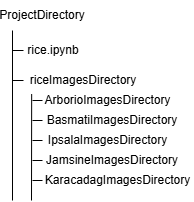

# Pre-processing

The dataset contains images of rice placed against a black background. Each class of rice ("Arborio", "Basmati", etc.) are organized into separate folders, each containing 1,000* images. Our goal here is to preprocess these images and their labels to make them suitable for training a machine learning model.

*The original dataset had far more, but we brought them down to a realistic proportion for us to work against.

In [30]:
data = []   # holds the image data (processed, resized, & normalized as numpy arrays)
labels = [] # holds the original string labels (like "Arborio", "Basmati") for each img

for label in os.listdir(BASE_PATH):
    folder_path = os.path.join(BASE_PATH, label)
    
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            
            image = cv.imread(image_path)
            
            if image is not None:
                image = cv.resize(image, SCALED_IMG_SIZE)
                
                # normalize image to 0, 1
                image = image / NORMALIZATION_SCALE
                
                data.append(image)
                labels.append(label)

# convert the data list to a numpy array
data = np.array(data)
labels = np.array(labels)

# label to int mapping
# i.e., mapping might look like this...
# "Arborio" ->   0
# "Basmati" ->   1
# "Ipsala" ->    2
# "Jasmine" ->   3
# "Karacadag" -> 4
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels_encoded, test_size=0.2)

# df
df = pd.DataFrame(list(zip(labels, labels_encoded)), columns=["label", "encoded_label"])

We first loop through each subfolder representing the rice varieties or labels within the main riceImages directory. For each label folder, we then read each image. The images are read using OpenCV (cv.imread()), which loads the image in its original format.

Each image is resized to a consistent size of 128x128 pixels using OpenCV’s cv.resize(). We're doing this since neural networks prefer when the images match aspect ratios & dimensions as input.

After resizing the image, we normalize the pixel values by dividing the pixel values by 255. This makes sure values are in the range of (0-1). Normalizing the image is also good for helping the model learn more effectively since neural networks tend to converge faster when input data is scaled.

# Modeling (just an example from pre-processing & actually using the data I worked on)

In [31]:
# VVV using tensorflow.keras.models here VVV
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))  # 5 classes (may be good just to use the len of labels lol)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,267,973 (12.47 MB)

 Trainable params: 3,267,973 (12.47 MB)

 Non-trainable params: 0 (0.00 B)